In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data():
    rows = []
    
    with open('long_jump_data.txt') as f:
        for line in f:
            rows.append(map(float, line.strip().split()))
            
    return pd.DataFrame(rows, columns=['year', 'value'])

In [3]:
df = load_data()
df.head()

,year,value
0,-4.0,249.750
1,0.0,282.875
2,4.0,289.000
3,8.0,294.500
4,12.0,299.250


In [4]:
TRAIN_SIZE = 20

X, y = df[['year']].as_matrix(), df['value'].values
X_train, X_test = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
y_train, y_test = y[:TRAIN_SIZE], y[TRAIN_SIZE:]

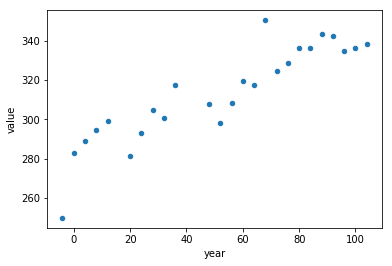

In [5]:
df.plot.scatter('year', 'value')

In [6]:
def mse(y_true, y_pred):
    return np.square(y_true - y_pred).sum() / len(y_true)

class LinearRegression:
    def __init__(self):
        self._w = None
        
    @staticmethod
    def _add_identity_col(X):
        identity_col = np.ones((X.shape[0], 1))
        return np.hstack((identity_col, X))
    
    def fit(self, X, y):
        X = self._add_identity_col(X)
        self._w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self
    
    def predict(self, X):
        X = self._add_identity_col(X)
        return X.dot(self._w)

In [7]:
def add_polinomial_features(X, degree):
    cols = [X]
    for d in range(2, degree + 1):
        cols.append(np.power(X, d))
    return np.hstack(cols)

In [8]:
test_results = []
lines = []

for degree in range(1, 6):
    X_train_ = add_polinomial_features(X_train, degree)
    X_test_ = add_polinomial_features(X_test, degree)
    X_ = add_polinomial_features(X, degree)
    
    lr = LinearRegression().fit(X_train_, y_train)
    y_pred = lr.predict(X_test_)
    test_results.append({'degree': degree, 'mse': mse(y_test, y_pred)})
    
    lines.append({'degree': degree, 'ys': lr.predict(X_)})

In [9]:
test_results_df = pd.DataFrame(test_results)
test_results_df

,degree,mse
0,1,89.342075
1,2,45.022295
2,3,1147.460321
3,4,2374.262115
4,5,15.995285


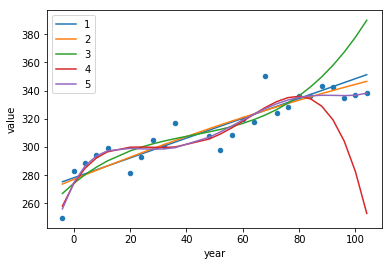

In [10]:
def plot_lines():
    df.plot.scatter('year', 'value')
    for line in lines:
        plt.plot(X[:, 0], line['ys'], label=line['degree'])
    plt.legend()
        
plot_lines()